In [1]:
import pickle
import numpy as np
import math
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
# Load data from the pickle file
with open('capacitor_dataset.pickle', 'rb') as f:
    data = pickle.load(f)
# print(data)

In [3]:
# Extract time and charge values from the data
time = data[:, 0].reshape(-1, 1)  # Reshape to 2D array for sklearn API
charge = data[:, 1]

In [4]:
# Set up the linear regression model
model = LinearRegression()

# Transform the equation to linear form by taking the logarithm
log_charge = np.log(charge)
# log_time = time.ravel() / -np.mean(time)  # Scale time to avoid numerical issues
# X = np.column_stack((log_time, np.ones_like(log_time)))

In [5]:
# Fit the model to the transformed data
model.fit(time, log_charge)

# Extract the estimated coefficients
slope, intercept = model.coef_, model.intercept_
# print(slope[0],intercept)

Estimated capacitance (C) = 4.999999999999699e-05 F
Estimated resistance (R) = 100000.00000000605 Ω


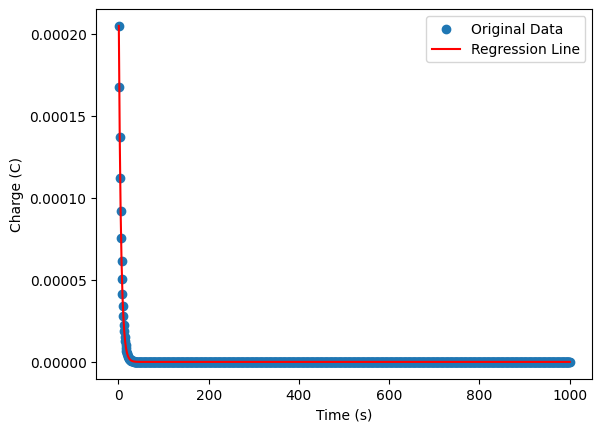

In [6]:
# Extract the estimated values of C and R
# logrithmic equation is: log(Q) = (-1/(RC))t + log(5C)
#                     as: y = mx + c
# so slope = -1/(RC)   intercept = log(5C)

C = math.exp(intercept)/5
R = -1/(slope*C)
# print(C,R)
# Print the estimated values of C and R
print(f"Estimated capacitance (C) = {C} F")
print(f"Estimated resistance (R) = {R[0]} Ω")# Plot the original data and the regression line
fig, ax = plt.subplots()
ax.scatter(time, charge, label='Original Data')
ax.plot(time, 5*C*np.exp(-time/(R*C)), 'r-', label='Regression Line')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Charge (C)')
ax.legend()
plt.show()

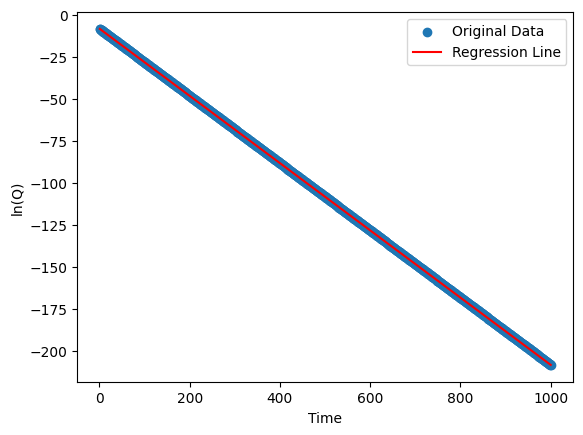

In [7]:
# Plot the logarithmic linear regression
fig, ax = plt.subplots()
ax.scatter(time, log_charge, label='Original Data')
ax.plot(time, slope*time + intercept, 'r-', label='Regression Line')
ax.set_xlabel('Time')
ax.set_ylabel('ln(Q)')
ax.legend()
plt.show()